# Qual é o melhor plano?

Você trabalha como analista para a empresa de telecomunicações Megaline. A empresa oferece aos clientes dois planos pré-pagos: Surf e Ultimate. O departamento comercial quer saber qual dos planos gera mais receita para ajustar o orçamento de publicidade.

Você vai realizar uma análise preliminar dos planos com base em uma pequena seleção de clientes. Você terá dados de 500 clientes da Megaline: que clientes são, de onde eles são, qual plano usam e o número de chamadas e mensagens realizadas em 2018. Seu trabalho é analisar o comportamento dos clientes e determinar qual plano pré-pago gera mais receita.

# Resumo do Projeto

**Esse projeto visa estudar o comportamento dos usuários de dois planos pré-pagos da empresa Megaline: Surf e Ultimate. Durante o projeto será realizada primeiramente a preparação dos dados, que inclui o preenchimento de dados ausentes, renomeação de colunas, _casting_ e criação de novas colunas. Em seguida, as tabelas serão agregadas em uma só, nomeada "merge_data", para realização de novas manipulações de dados como o cálculo da receita mensal de cada usuário e para criação de gráficos informativos. Por fim, serão testadas duas hipóteses: "receitas médias dos usuários dos planos de chamadas Ultimate e Surf são diferentes" e "receitas médias dos usuários da área de NY-NJ difere dos usuários das demais regiões"**

## Inicialização

In [1]:
# Carregando todas as bibliotecas
import pandas as pd
import numpy as np
from scipy import stats as st 
import math
from matplotlib import pyplot as plt

## Carregue os dados

In [2]:
# Carregue os arquivos de dados em diferentes DataFrames
users = pd.read_csv('/datasets/megaline_users.csv')
calls = pd.read_csv('/datasets/megaline_calls.csv')
messages = pd.read_csv('/datasets/megaline_messages.csv')
internet = pd.read_csv('/datasets/megaline_internet.csv')
plans = pd.read_csv('/datasets/megaline_plans.csv')


## Prepare os dados

## Planos

In [3]:
# Impressão das informações gerais/resumidas sobre o DataFrame dos planos
plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In [4]:
# Impressão de uma amostra de dados dos planos
plans.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


**Observa-se que não há dados ausentes e a escolha dos tipos de dados da tabela está correta. Contudo, ficará mais legível se a coluna _plan_name_ vier antes de todas as outras. Além disso, como a Megaline realiza a cobrança mensal por Gigabyte(Gb) usado, é interessante realizar a transformação dos dados da coluna _mb_per_month_included_ para Gigabyte. Por fim, para manter a coesão da coluna, é necessário renomea-la para _gb_per_month_included_.**

## Corrija os dados

In [5]:
#Reordenação da coluna plan_name
plans = plans[['plan_name',
               'messages_included',
               'mb_per_month_included',
               'minutes_included',
               'usd_monthly_pay',
               'usd_per_gb',
               'usd_per_message',
               'usd_per_minute']]

In [6]:
plans['mb_per_month_included'] = plans['mb_per_month_included']//1024

In [7]:
plans.rename(columns = {'mb_per_month_included': 'gb_per_month_included'}, inplace = True)

In [8]:
plans

,plan_name,messages_included,gb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute
0,surf,50,15,500,20,10,0.03,0.03
1,ultimate,1000,30,3000,70,7,0.01,0.01


## Usuários

In [9]:
# Impressão das informações gerais/resumidas sobre o DataFrame dos usuários
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [10]:
# Impressão de uma amostra de dados dos usuários
users.sample(20)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
189,1189,Terrence,Smith,75,"Columbus, OH MSA",2018-09-24,surf,NaN
338,1338,Janise,Bowman,21,"Minneapolis-St. Paul-Bloomington, MN-WI MSA",2018-08-09,surf,NaN
262,1262,Michelina,Hamilton,34,"Dallas-Fort Worth-Arlington, TX MSA",2018-02-09,surf,NaN
87,1087,Lenard,Atkinson,45,"Washington-Arlington-Alexandria, DC-VA-MD-WV MSA",2018-11-18,surf,NaN
29,1029,Franklyn,Henson,59,"Tampa-St. Petersburg-Clearwater, FL MSA",2018-01-05,surf,NaN
237,1237,Leighann,Wheeler,50,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-08-26,ultimate,NaN
118,1118,Deane,Ramirez,28,"Columbus, OH MSA",2018-12-08,surf,NaN
493,1493,Cicely,Wynn,18,"Boston-Cambridge-Newton, MA-NH MSA",2018-03-06,ultimate,NaN
22,1022,Bo,Snow,73,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-04-20,surf,2018-09-07
265,1265,Alec,Henry,29,"Washington-Arlington-Alexandria, DC-VA-MD-WV MSA",2018-11-23,surf,NaN


In [11]:
##Número de ligações duplicadas
users.duplicated().sum()

0

**Observa-se a ausência da dados em 466 células da coluna "churn_date". Tal ausência, contudo, expressa que o plano estava em uso quando o banco de dados foi extraído, conforme explicado na especificação do banco de dados. Como essa ausência de dados não irá comprometer a análise, não será feito o preenchimento nesse momento.**

**Por outro lado, as colunas _reg_date_ e _churn_date_ representam datas e, portanto, serão convertidas para o tipo _datetime_**

**Solução adotada: realização da conversão para datetime utilizando a função _to_datetime()_ da biblioteca _Pandas_.**

### Correção dos dados

In [12]:
users['reg_date'] = pd.to_datetime(users['reg_date'], format= "%Y-%m-%d" )

In [13]:
users['churn_date'] = pd.to_datetime(users['churn_date'], format= "%Y-%m-%d" , errors = 'ignore')

In [14]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    object        
 7   churn_date  34 non-null     datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


## Chamadas

In [15]:
# Impressão das informações gerais/resumidas sobre o DataFrame das chamadas

calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [16]:
# Impressão de uma amostra de dados das chamadas

calls.sample(20)

,id,user_id,call_date,duration
109612,1386_72,1386,2018-12-30,10.26
57316,1205_77,1205,2018-12-10,13.83
19468,1073_324,1073,2018-11-11,17.42
10858,1049_25,1049,2018-11-10,10.25
112390,1396_101,1396,2018-09-02,2.65
91196,1328_826,1328,2018-10-01,0.00
32140,1120_600,1120,2018-11-12,11.45
7963,1038_74,1038,2018-11-24,1.80
86609,1320_278,1320,2018-11-04,4.58
63865,1232_100,1232,2018-08-10,3.11


In [17]:
##Número de ligações duplicadas
calls.duplicated().sum()

0

In [18]:
#número de ligações com duração igual a 0
(calls['duration'] == 0).sum()

26834

**Não há a ausência de dados e nem dados duplicados aqui, mas há muitas linhas onde o tempo de duração da ligação registrado é de 0.00 . ligações como essas ou representam erros de registro ou ligações que duraram abaixo da precisão de 2 casas decimais utilizada. Como essas sessões não agregam informação de tempo, podemos descartar as linhas onde _duration = 0.00_.** <br>

**Como a Megaline arredonda segundos para minutos, é importante ter o tempo de cada chamada individual em minutos. Para isso, será realizada uma nova coluna chamada _duration_minutes_, que representará o tempo da chamada em minutos (opta-se por não substituir os dados da coluna _duration_, pois isso acarretaria na perda dos segundos da ligação, o que pode ser importante em algumas análises estatísticas).  <br>  
Além disso, a coluna _call_date_ deve ser convertida para o tipo _datetime_, uma vez que essa coluna representa data.**  <br>

**Por fim, a coluna _id_ tem um nome com baixa identificação com o que ele representa: o número de identificação unívoco da chamada. Portanto, vamos renomea-la também.** 

### Correção dos dados

In [ ]:
##Eliminação de linhas onde a quantidade de megas usado é igual a 0
calls.drop(calls[calls['duration'] == 0].index, inplace = True)

In [20]:
calls['call_date'] = pd.to_datetime(calls['call_date'], format = '%Y-%m-%d')

In [21]:
calls.rename(columns = {'id': 'call_id'}, inplace = True)

### Enriquecimento dos dados

In [22]:
##realiza coluna com duração em minutos e arredondamento para cima
calls['duration_minutes'] = calls['duration'].apply(math.ceil)

In [23]:
#Criação da coluna que contém apenas o mês. Essa informação será útil na fase de agregação dos dados por cada mês
calls['month'] = calls['call_date'].dt.month

In [24]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110901 entries, 0 to 137734
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   call_id           110901 non-null  object        
 1   user_id           110901 non-null  int64         
 2   call_date         110901 non-null  datetime64[ns]
 3   duration          110901 non-null  float64       
 4   duration_minutes  110901 non-null  int64         
 5   month             110901 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(1)
memory usage: 5.9+ MB


## Mensagens

In [25]:
# Impressão das informações gerais/resumidas sobre o DataFrame das mensagens
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [26]:
# Impressão de uma amostra dos dados das mensagens
messages.sample(10)

,id,user_id,message_date
58705,1373_123,1373,2018-10-25
45284,1304_269,1304,2018-11-13
55091,1347_128,1347,2018-08-01
6943,1057_267,1057,2018-10-21
75342,1491_143,1491,2018-12-26
29189,1178_328,1178,2018-10-16
23881,1144_372,1144,2018-09-07
57547,1362_641,1362,2018-09-21
26130,1159_133,1159,2018-09-21
21091,1132_282,1132,2018-08-02


In [27]:
messages.duplicated().sum()

0

**Não há a ausência de dados e nem dados duplicados aqui, mas algumas alterações são necessárias.**

**A coluna _message_date_ deve ser convertida para o tipo _datetime_, uma vez que essa coluna representa data.**  <br>

**Por fim, a coluna _id_ tem um nome com baixa identificação com o que ele representa: o número de identificação unívoco da  mensagem. Portanto, vamos renomea-la também.** 

### Correção dos dados

In [28]:
messages.rename(columns = {'id': 'message_id'}, inplace = True)

In [29]:
messages['message_date'] = pd.to_datetime(messages['message_date'], format = '%Y-%m-%d')

In [30]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   message_id    76051 non-null  object        
 1   user_id       76051 non-null  int64         
 2   message_date  76051 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.7+ MB


### Enriquecimento dos dados

In [31]:
#Criação da coluna que contém apenas o mês. Essa informação será útil na fase de agregação dos dados por cada mês
messages['month'] = messages['message_date'].dt.month

## Internet

In [32]:
# Impressão das informações gerais/resumidas sobre o DataFrame da internet
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [33]:
#  Impressão de uma amostra de dados para o tráfego da internet
internet.sample(20)

,id,user_id,session_date,mb_used
9147,1046_432,1046,2018-10-10,176.96
60752,1277_55,1277,2018-08-19,763.63
31213,1142_229,1142,2018-11-01,0.00
47556,1212_331,1212,2018-08-25,84.49
44807,1198_181,1198,2018-12-24,499.65
58059,1261_533,1261,2018-12-10,718.91
52401,1236_256,1236,2018-08-10,0.00
98120,1462_93,1462,2018-11-18,45.23
103762,1496_70,1496,2018-10-14,23.96
31385,1144_91,1144,2018-07-18,458.56


In [34]:
internet.duplicated().sum()

0

In [35]:
(internet['mb_used'] == 0).sum()

13747

**Não há a ausência de dados e nem dados duplicados aqui, mas há muitas linhas onde o consumo relatado é de 0.00 mb. Sessões como essas ou representam erros de registro ou um consumo baixíssimo, abaixo da precisão de 2 casas decimais utilizada. Como essas sessões não agregam informação de consumo, podemos descartar as linhas onde _mb_used = 0.00_.** <br>  

**Além disso, A coluna _session_date_ deve ser convertida para o tipo _datetime_, uma vez que essa coluna representa data.**  <br>

**Por fim, a coluna _id_ tem um nome com baixa identificação com o que ele representa: o número de identificação unívoco da  sessão. Portanto, vamos renomea-la também.**

### Correção os dados

In [36]:
##Elimina linhas onde a quantidade de megas usado é igual a 0
internet.drop(internet[internet['mb_used'] == 0].index, inplace = True)

In [37]:
internet.rename(columns = {'id': 'session_id'}, inplace = True)

In [38]:
internet['session_date'] = pd.to_datetime(internet['session_date'], format = '%Y-%m-%d')

In [39]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 91078 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   session_id    91078 non-null  object        
 1   user_id       91078 non-null  int64         
 2   session_date  91078 non-null  datetime64[ns]
 3   mb_used       91078 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 3.5+ MB


In [40]:
internet.sample(10)

,session_id,user_id,session_date,mb_used
69442,1324_158,1324,2018-10-18,767.46
80854,1377_279,1377,2018-10-06,48.83
63133,1291_258,1291,2018-07-09,69.33
88599,1408_318,1408,2018-08-11,127.88
32363,1146_397,1146,2018-12-15,283.49
96500,1453_67,1453,2018-11-09,340.32
27638,1127_390,1127,2018-12-20,64.19
47542,1212_300,1212,2018-08-20,225.20
26693,1123_188,1123,2018-11-02,28.83
49445,1220_486,1220,2018-11-08,248.96


### Enriquecimento dos dados

In [41]:
#Criação da coluna que contém apenas o mês. Essa informação será útil na fase de agregação dos dados por cada mês
internet['month'] = internet['session_date'].dt.month

## Estude as condições dos planos

In [ ]:
# Impressão das condições do plano
plans

,plan_name,messages_included,gb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute
0,surf,50,15,500,20,10,0.03,0.03
1,ultimate,1000,30,3000,70,7,0.01,0.01


**As condições dos planos estão conforme especificação.**

## Agregação dos dados por usuário

In [ ]:
# Calculo do número de chamadas feitas por cada usuário por (cada) mês. Salvamento do resultado.
num_calls_per_user = calls.groupby(['user_id', 'month'])['call_id'].count().reset_index()

In [44]:
num_calls_per_user.rename(columns = {'call_id': 'num_calls'}, inplace = True)

In [45]:
num_calls_per_user

,user_id,month,num_calls
0,1000,12,16
1,1001,8,22
2,1001,9,38
3,1001,10,47
4,1001,11,49
...,...,...,...
2251,1498,12,32
2252,1499,9,35
2253,1499,10,41
2254,1499,11,39


In [46]:
total_minutes_calls_per_user = calls.groupby(['user_id', 'month'])['duration_minutes'].sum().reset_index()

In [47]:
total_minutes_calls_per_user.rename(columns = {'duration_minutes': 'total_duration'}, inplace = True)

In [48]:
total_minutes_calls_per_user

,user_id,month,total_duration
0,1000,12,124
1,1001,8,182
2,1001,9,315
3,1001,10,393
4,1001,11,426
...,...,...,...
2251,1498,12,339
2252,1499,9,346
2253,1499,10,385
2254,1499,11,308


In [49]:
# Cálculo do número de mensagens enviadas por cada usuário por mês. Salvamento do resultado.
num_messages_per_user = messages.groupby(['user_id', 'month'])['message_id'].count().reset_index()

In [50]:
num_messages_per_user.rename(columns = {'message_id': 'num_messages'}, inplace = True)

In [51]:
num_messages_per_user

,user_id,month,num_messages
0,1000,12,11
1,1001,8,30
2,1001,9,44
3,1001,10,53
4,1001,11,36
...,...,...,...
1801,1496,9,21
1802,1496,10,18
1803,1496,11,13
1804,1496,12,11


In [52]:
# Cálculo do volume de tráfego de internet usado por cada usuário por mês. Salvamento do resultado.
mb_per_user = internet.groupby(['user_id', 'month'])['mb_used'].sum().reset_index()

In [53]:
## Conversão do consumo para gigabytes
mb_per_user['mb_used'] = (mb_per_user['mb_used']/1024).apply(math.ceil)

In [54]:
mb_per_user.rename(columns = {'mb_used': 'total_gb_used'}, inplace = True)

In [55]:
mb_per_user

,user_id,month,total_gb_used
0,1000,12,2
1,1001,8,7
2,1001,9,14
3,1001,10,22
4,1001,11,19
...,...,...,...
2272,1498,12,23
2273,1499,9,13
2274,1499,10,20
2275,1499,11,17


In [56]:
# Junção dos dados de chamadas, minutos, mensagens e internet com base em user_id e month

#merge de total de chamadas com quantidade de minutos em chamadas
merge_data = num_calls_per_user.merge(total_minutes_calls_per_user, how = 'outer')

#merge com total de mensagens
merge_data = merge_data.merge(num_messages_per_user, how = 'outer')

#merge com total de internet
merge_data = merge_data.merge(mb_per_user, how = 'outer')

#merge com plano de usuários
merge_data = merge_data.merge(users.loc[:, ['user_id', 'plan']])


In [57]:
# verificação dos valores unívocos da coluna "plan".
merge_data['plan'].unique()

array(['ultimate', 'surf'], dtype=object)

In [58]:
# Verificação de valores ausentes em "plan"
merge_data['plan'].isna().sum()

0

In [59]:
merge_data

,user_id,month,num_calls,total_duration,num_messages,total_gb_used,plan
0,1000,12,16.0,124.0,11.0,2.0,ultimate
1,1001,8,22.0,182.0,30.0,7.0,surf
2,1001,9,38.0,315.0,44.0,14.0,surf
3,1001,10,47.0,393.0,53.0,22.0,surf
4,1001,11,49.0,426.0,36.0,19.0,surf
...,...,...,...,...,...,...,...
2288,1204,12,NaN,NaN,78.0,36.0,ultimate
2289,1349,10,NaN,NaN,76.0,13.0,surf
2290,1349,11,NaN,NaN,72.0,17.0,surf
2291,1349,12,NaN,NaN,61.0,13.0,surf


In [60]:
valor_total = []

In [61]:
# Criação da função que calcula a receita mensal por usuário por período
def calcula_receita(row):
    plano = row['plan']
    informacoes_plano = plans[plans['plan_name'] == plano]
    valor_adicional = 0
    valor_mensal = informacoes_plano['usd_monthly_pay']
    #subtração do limite gratuito do pacote do número total de chamadas
    if int(informacoes_plano['minutes_included']) < row['total_duration']:
        minutos_adicionais = row['total_duration'] - int(informacoes_plano['minutes_included'])
        valor_adicional += minutos_adicionais * informacoes_plano['usd_per_minute']
        
    #subtração do limite gratuito do pacote do número total de mensagens
    if int(informacoes_plano['messages_included']) < row['num_messages']:
        mensagens_adicionais = row['num_messages'] - int(informacoes_plano['messages_included'])
        valor_adicional += mensagens_adicionais * informacoes_plano['usd_per_message']
        
    #subtração do limite gratuito do pacote de dados
    if int(informacoes_plano['gb_per_month_included']) < row['total_gb_used']:
        dados_adicionais = row['total_gb_used'] - int(informacoes_plano['gb_per_month_included'])
        valor_adicional += dados_adicionais * informacoes_plano['usd_per_gb'] 
        
    valor_total.append(float(valor_mensal + valor_adicional)) 

In [62]:
##Aplicação da função em cada linha do DataFrame
valor_total = []
merge_data.apply(calcula_receita, axis = 1)

0       None
1       None
2       None
3       None
4       None
        ... 
2288    None
2289    None
2290    None
2291    None
2292    None
Length: 2293, dtype: object

In [63]:
len(valor_total) == merge_data.shape[0]

True

In [64]:
# Criação da coluna com receitas mensais de cada usuário por período
merge_data['receita_mensal'] = valor_total

In [65]:
merge_data

,user_id,month,num_calls,total_duration,num_messages,total_gb_used,plan,receita_mensal
0,1000,12,16.0,124.0,11.0,2.0,ultimate,70.00
1,1001,8,22.0,182.0,30.0,7.0,surf,20.00
2,1001,9,38.0,315.0,44.0,14.0,surf,20.00
3,1001,10,47.0,393.0,53.0,22.0,surf,90.09
4,1001,11,49.0,426.0,36.0,19.0,surf,60.00
...,...,...,...,...,...,...,...,...
2288,1204,12,NaN,NaN,78.0,36.0,ultimate,112.00
2289,1349,10,NaN,NaN,76.0,13.0,surf,20.78
2290,1349,11,NaN,NaN,72.0,17.0,surf,40.66
2291,1349,12,NaN,NaN,61.0,13.0,surf,20.33


## Estudo do comportamento do usuário

### Chamadas

In [66]:
## Criação da coluna que possui a média de duração de ligação por usuário a cada mês
merge_data['mean_duration'] = merge_data['total_duration']/merge_data['num_calls']
merge_data.fillna(0, inplace = True)

In [67]:
mean_duration_by_plan_by_month = pd.pivot_table(merge_data, index = 'month', columns = 'plan', values = 'mean_duration', aggfunc = 'mean')
mean_duration_by_plan_by_month

plan,surf,ultimate
month,,
1,8.365546,8.953046
2,8.887961,7.594999
3,8.959747,8.362815
4,8.800056,8.763824
5,8.655385,8.919458
6,8.800745,8.387764
7,8.584832,9.014055
8,8.667616,8.768760
9,8.724540,8.866484


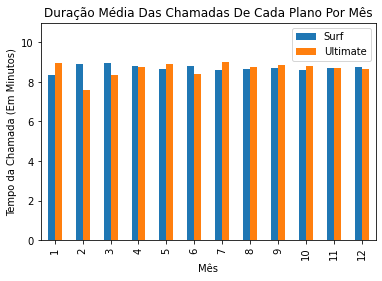

In [68]:
# Comparação da duração média das chamadas de cada plano para cada mês distinto. Criação de um gráfico de barras para visualizá-lo.
mean_duration_by_plan_by_month.plot(kind = 'bar',
                                   title = 'Duração Média Das Chamadas De Cada Plano Por Mês',
                                   xlabel = 'Mês',
                                   ylabel = 'Tempo da Chamada (Em Minutos)',
                                   ylim = [0, 11])
plt.legend(['Surf', 'Ultimate'])
plt.show()

In [69]:
merge_data['month'].sort_values().unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

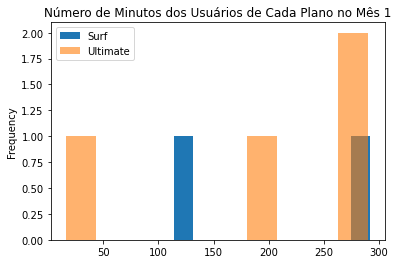

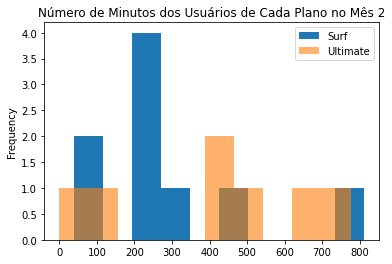

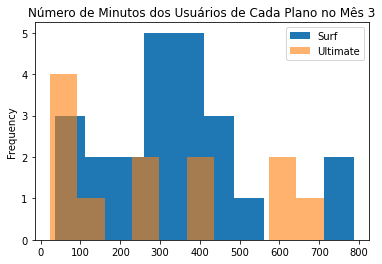

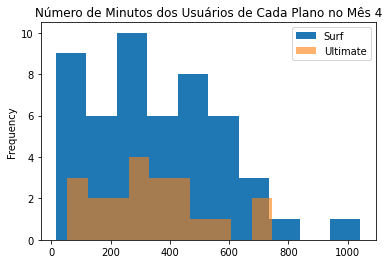

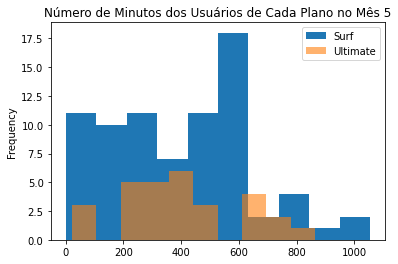

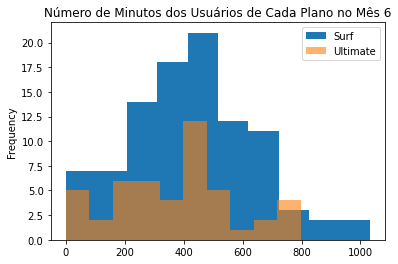

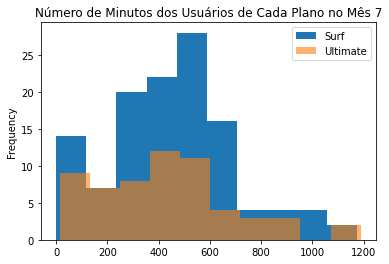

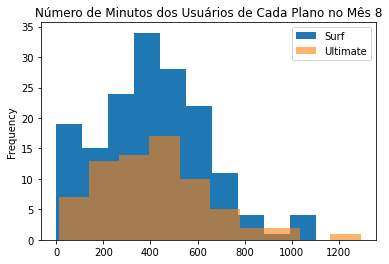

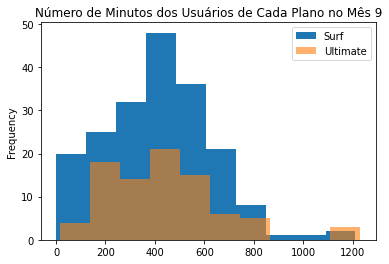

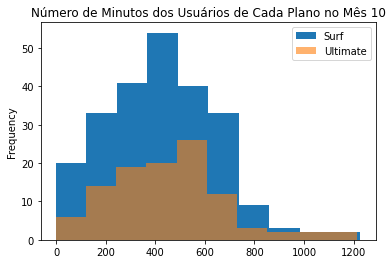

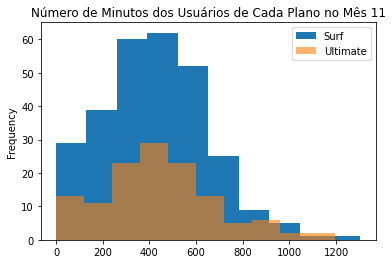

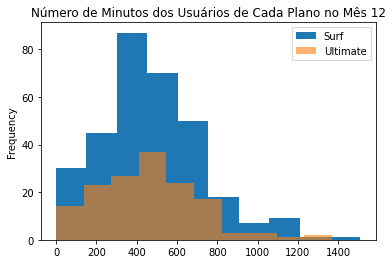

In [70]:
# Comparação do número de minutos de que os usuários de cada plano necessitam a cada mês. Construção de um histograma.
# Histograma por mês - plano Surf

for i in merge_data['month'].sort_values().unique():
    merge_data.query('month == @i & plan == "surf"')['total_duration'].plot(kind = 'hist', title = f'Número de Minutos dos Usuários de Cada Plano no Mês {i}')

    merge_data.query('month == @i & plan == "ultimate"')['total_duration'].plot(kind = 'hist',
                                                alpha = 0.6)
    plt.legend(['Surf', 'Ultimate'])
    plt.show()

In [71]:
# Cálculo da média e a variação da duração mensal das chamadas
merge_data.groupby('month')['total_duration'].agg(['mean', 'var'])


,mean,var
month,,
1,196.666667,13135.866667
2,343.437500,61567.329167
3,321.171429,43378.499160
4,347.197183,45620.531992
5,401.405660,54950.510063
6,411.604167,45086.240822
7,442.472222,64525.781347
8,413.562232,53926.747188
9,421.378571,49735.899181


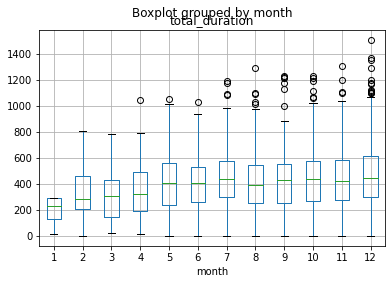

In [72]:
# Criação de um diagrama de caixa para visualizar a distribuição da duração mensal das chamadas

merge_data.boxplot(column = 'total_duration', by = 'month')

plt.show()

O gráfico de duração média das chamadas de cada plano por mês evidência que a escolha do plano pouco influencia 
no tempo médio da ligação. Ao longo do ano observa-se uma média do tempo de ligação dos usuários do plano surf muito parecido com a média do tempo de ligação dos usuários do plano ultimate, com variações de menos de 2 minutos.

Dos histogramas pode-se concluir que a escolha do plano também não interfere no número de minutos por usuário. Observa-se que tanto para o plano Surf quanto o plano Ultimate há uma assimetria à direita, com a maior parte do tempo total de ligações por mês entre 200 e 700 minutos. Observa-se, ainda, histogramas com barras mais espaçadas dos meses 01 a 05, justificada pela baixa quantidade de dados daqueles meses.

Por sua vez, os dados de média permitem concluir que a média das ligações também pouco variam, com médias sempre próximas ao intervalo entre 400 e 470 ( a média dos meses 1 a 4 está abaixo devido à baixa amostragem). Já a variância em conjunto com boxplot permite inferir que os dados ficam mais dispersos na segunda metade do ano, ou seja, com mais frequência há ligações muito acima ou muito abaixo da média (de fato, as bolas brancas sinalizam um aumento do número de _outliers_)

### Mensagens

In [73]:
# Comparação do número de mensagens que os usuários de cada plano tendem a enviar a cada mês

messages_by_plan_by_month = pd.pivot_table(merge_data, index = 'month', columns = 'plan', values = 'num_messages', aggfunc = 'mean')

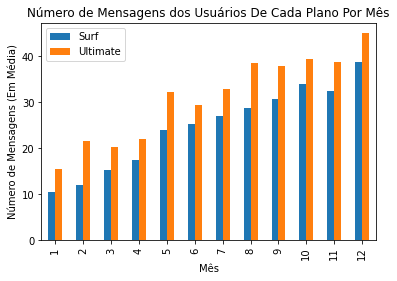

In [74]:
messages_by_plan_by_month.plot(kind = 'bar',
                               title = 'Número de Mensagens dos Usuários De Cada Plano Por Mês',
                               xlabel = 'Mês',
                               ylabel = 'Número de Mensagens (Em Média)')
plt.legend(['Surf', 'Ultimate'])
plt.show()

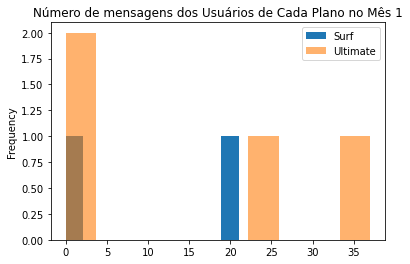

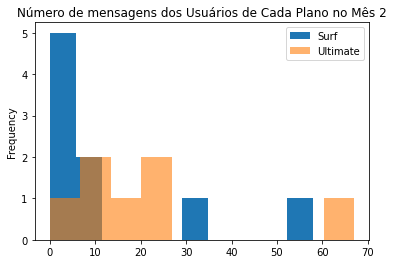

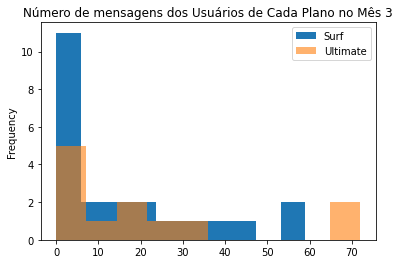

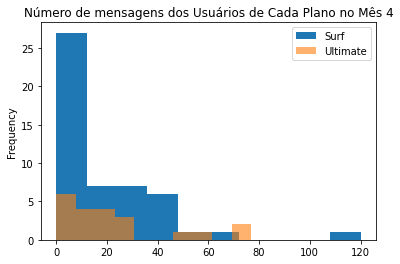

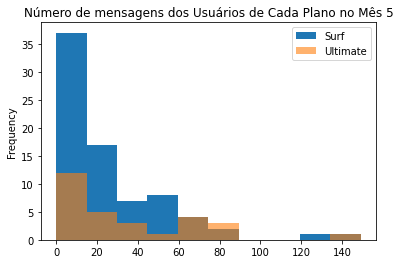

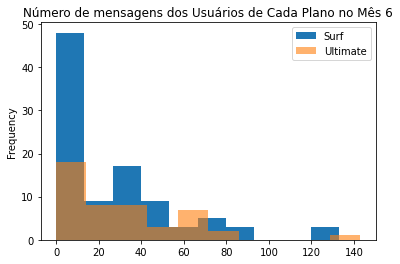

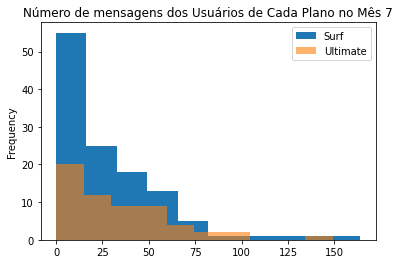

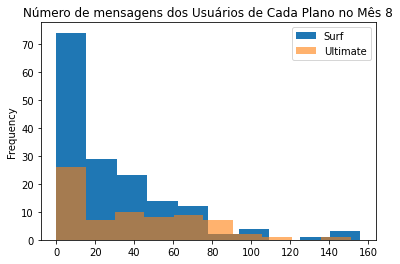

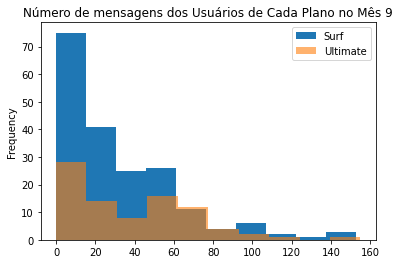

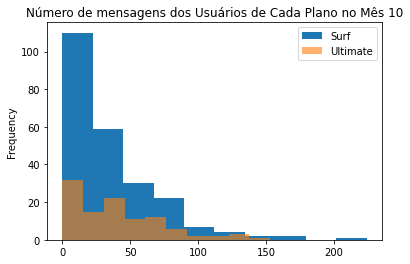

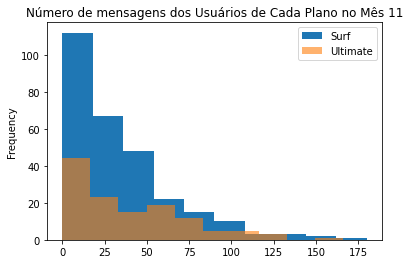

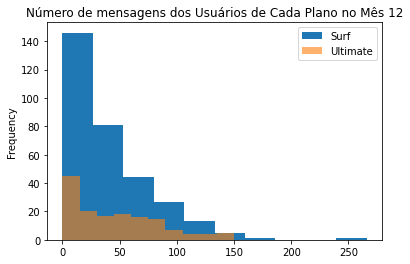

In [75]:
# Comparação do número de mensagens que os usuários de cada plano mandam a cada mês. Construa um histograma.

for i in merge_data['month'].sort_values().unique():
    merge_data.query('month == @i & plan == "surf"')['num_messages'].plot(kind = 'hist', title = f'Número de mensagens dos Usuários de Cada Plano no Mês {i}')

    merge_data.query('month == @i & plan == "ultimate"')['num_messages'].plot(kind = 'hist',
                                                alpha = 0.6)
    plt.legend(['Surf', 'Ultimate'])
    plt.show()

In [76]:
# Cálculo da média e a variação do número de mensagens por mês
merge_data.groupby('month')['num_messages'].agg(['mean', 'var'])


,mean,var
month,,
1,13.833333,238.966667
2,16.187500,421.229167
3,16.971429,441.734454
4,18.774648,511.148491
5,26.226415,972.291105
6,26.618056,893.706245
7,28.933333,938.051397
8,31.733906,1095.446130
9,32.953571,1025.442281


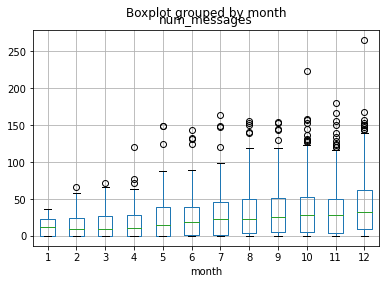

In [77]:
# Criação de um diagrama de caixa para visualizar a distribuição do número de mensagens

merge_data.boxplot(column = 'num_messages', by = 'month')

plt.show()

In [78]:
plans

,plan_name,messages_included,gb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute
0,surf,50,15,500,20,10,0.03,0.03
1,ultimate,1000,30,3000,70,7,0.01,0.01


O gráfico de número médio de mensagens por mês evidencia que os usuários do plano Ultimate utilizam mais mensagens do que os usuários do plano Surf. Contudo, a média do número de mensagens por mês dos usuários do plano Ultimate varia em torno 15 e 50 mensagens, muito aquém do número de mensagens inclusa no plano. Portanto, pode-se dizer que muitos usuários do plano Ultimate não aproveitam bem essa vantagem.

Dos histogramas pode-se concluir que a escolha do plano interfere pouco no número de mensagens. Observa-se que tanto para o plano Surf quanto o plano Ultimate há uma assimetria à direita, com a maior parte do número de mensagens por mês entre 0 e 50 mensagens. Observa-se, ainda, histogramas com barras mais espaçadas dos meses 01 a 05, justificada pela baixa quantidade de dados daqueles meses.

Os dados de média permitem concluir que há um crescimento linear na quantidade média das ligações ao longo do ano, que expressa o aumento no número de mensagens enviadas a medida que o ano se aproxima do fim. Já a variância em conjunto com boxplot permite inferir que os dados ficam mais dispersos com o passar do ano. Os _outliers_ presentes no boxplot variam em sua maioria entre 100 e 250, o que corrobora com a tese de que os usuários do plano Ultimate não chegam nem perto de utilizar as 1000 mensagens inclusas no plano.

### Internet

In [79]:
# Comparação da quantidade de tráfego de internet consumido pelos usuários por plano
internet_by_plan_by_month = pd.pivot_table(merge_data, index = 'month', columns = 'plan', values = 'total_gb_used', aggfunc = 'mean')


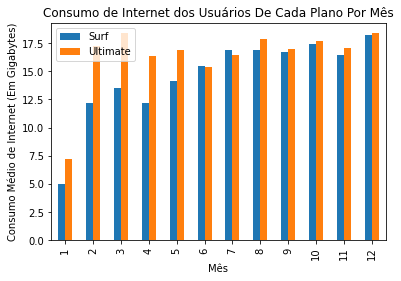

In [80]:
internet_by_plan_by_month.plot(kind = 'bar',
                               title = 'Consumo de Internet dos Usuários De Cada Plano Por Mês',
                               xlabel = 'Mês',
                               ylabel = 'Consumo Médio de Internet (Em Gigabytes)')
plt.legend(['Surf', 'Ultimate'])
plt.show()

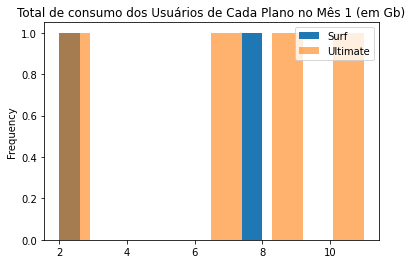

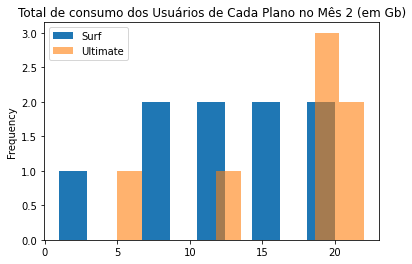

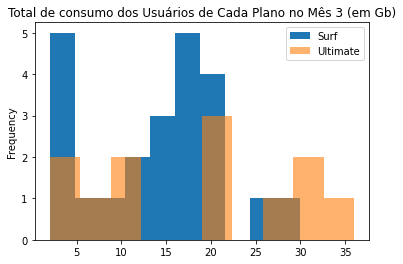

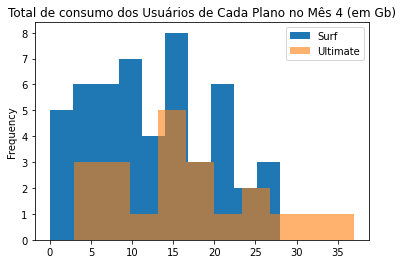

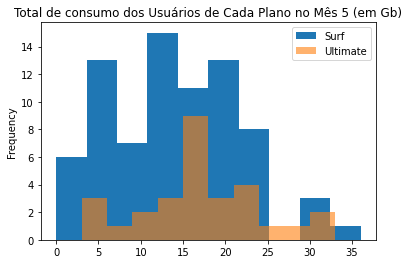

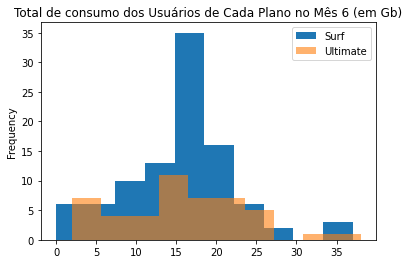

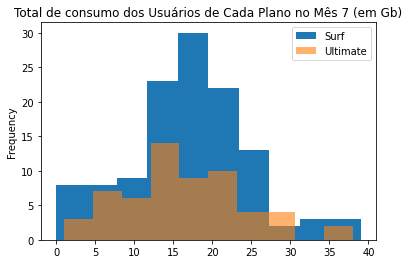

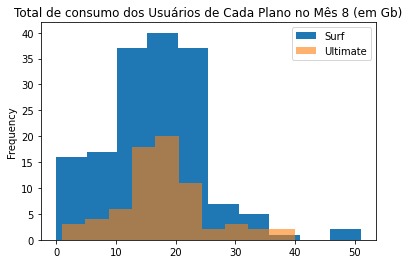

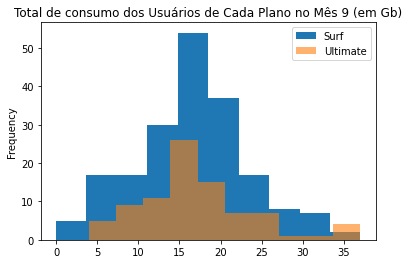

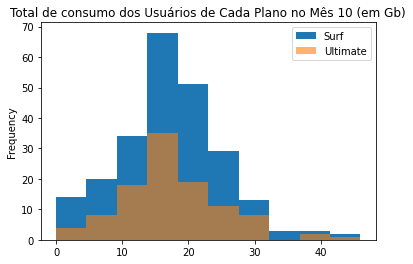

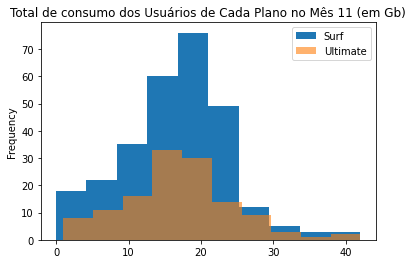

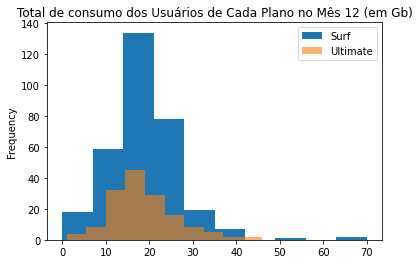

In [81]:
# Comparaçã o consumo de internet dos usuários de cada plano a cada mês. Construção de um histograma.

for i in merge_data['month'].sort_values().unique():
    merge_data.query('month == @i & plan == "surf"')['total_gb_used'].plot(kind = 'hist', title = f'Total de consumo dos Usuários de Cada Plano no Mês {i} (em Gb)')

    merge_data.query('month == @i & plan == "ultimate"')['total_gb_used'].plot(kind = 'hist',
                                                alpha = 0.6)
    plt.legend(['Surf', 'Ultimate'])
    plt.show()

In [82]:
# Cálculo da média e a variação do consumo de internet por mês
merge_data.groupby('month')['total_gb_used'].agg(['mean', 'var'])

,mean,var
month,,
1,6.500000,13.900000
2,14.437500,43.995833
3,15.228571,91.710924
4,13.436620,67.449497
5,14.867925,58.077628
6,15.465278,54.208576
7,16.750000,62.065642
8,17.175966,67.274937
9,16.789286,48.482322


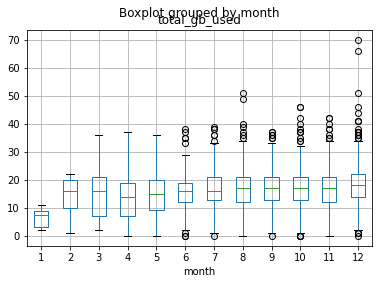

In [83]:
# Criação de um diagrama de caixa para visualizar a distribuição do consumo de internet

merge_data.boxplot(column = 'total_gb_used', by = 'month')

plt.show()

O gráfico do total de consumo médio de internet por plano por mês evidencia que os usuários do plano Ultimate costumam utilizar um pouco mais de internet do que os do plano Surf. Contudo, a média de consumo de internet do plano ultimate não ultrapassa 18 Gb, valor muito aquém do total incluso no plano (50Gb). Portanto, pode-se dizer que muitos usuários do plano Ultimate não aproveitam bem essa vantagem. Além disso, o plano Surf possui médias de consumo de internet superiores a 15 Gb entre o mês de Janeiro e Abril, o que indica que muitos usuários compraram pacotes adicionais de internet naqueles meses.

Dos histogramas pode-se concluir que a escolha do plano interfere pouco no número de mensagens. Observa-se que tanto para o plano Surf quanto o plano Ultimate há uma distribuição simétrica, com médias de consumo dos dois planos muito próximas. Observa-se, ainda, histogramas com barras mais espaçadas dos meses 01 a 05, justificada pela baixa quantidade de dados daqueles meses.

Os dados de média permitem concluir que há um crescimento linear na quantidade de consumo de internet ao longo do ano. Já a variância em conjunto com o boxplot permite inferir que os dados ficam mais dispersos do mês 6 ao 7. Dessa vez, há _outliers_ tanto após o 3º quartil quanto abaixo do 1º quartil, o que significa que há usuários que usam valores muito abaixo da média e usuários que usam valores muito acima da média.

## Receita

In [84]:
merge_data

,user_id,month,num_calls,total_duration,num_messages,total_gb_used,plan,receita_mensal,mean_duration
0,1000,12,16.0,124.0,11.0,2.0,ultimate,70.00,7.750000
1,1001,8,22.0,182.0,30.0,7.0,surf,20.00,8.272727
2,1001,9,38.0,315.0,44.0,14.0,surf,20.00,8.289474
3,1001,10,47.0,393.0,53.0,22.0,surf,90.09,8.361702
4,1001,11,49.0,426.0,36.0,19.0,surf,60.00,8.693878
...,...,...,...,...,...,...,...,...,...
2288,1204,12,0.0,0.0,78.0,36.0,ultimate,112.00,0.000000
2289,1349,10,0.0,0.0,76.0,13.0,surf,20.78,0.000000
2290,1349,11,0.0,0.0,72.0,17.0,surf,40.66,0.000000
2291,1349,12,0.0,0.0,61.0,13.0,surf,20.33,0.000000


In [85]:
# Receita por plano por mês
revenue_by_plan_by_month = pd.pivot_table(merge_data, index = 'month', columns = 'plan', values = 'receita_mensal', aggfunc = 'sum')


In [86]:
revenue_by_plan_by_month

plan,surf,ultimate
month,,
1,40.00,280.0
2,309.57,490.0
3,1056.65,896.0
4,2035.53,1533.0
5,3667.37,2051.0
6,4779.80,3367.0
7,7583.56,4242.0
8,10356.85,5173.0
9,11304.67,6195.0


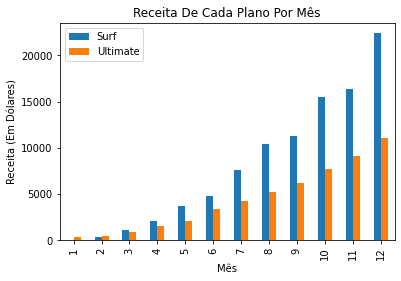

In [87]:
revenue_by_plan_by_month.plot(kind = 'bar',
                               title = 'Receita De Cada Plano Por Mês',
                               xlabel = 'Mês',
                               ylabel = 'Receita (Em Dólares)')
plt.legend(['Surf', 'Ultimate'])
plt.show()

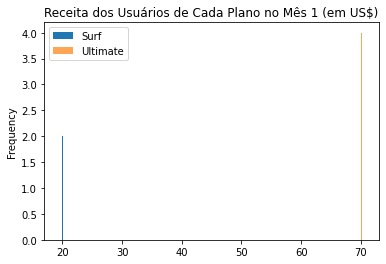

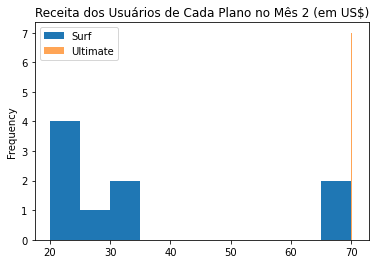

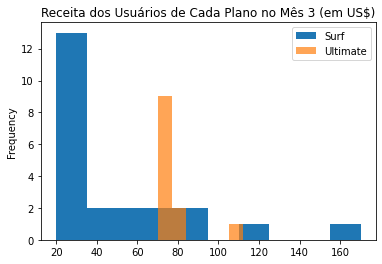

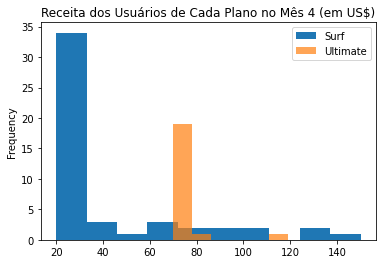

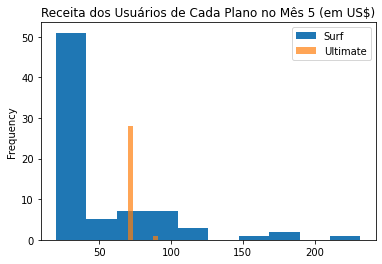

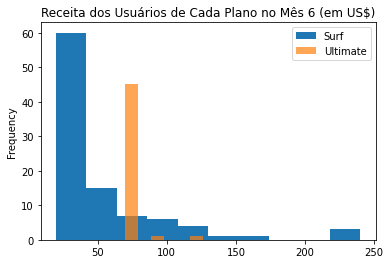

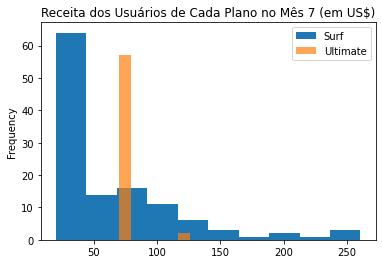

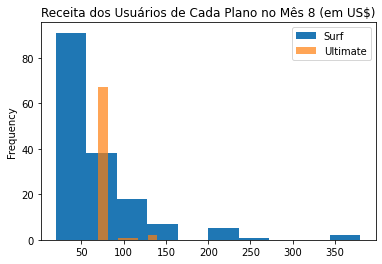

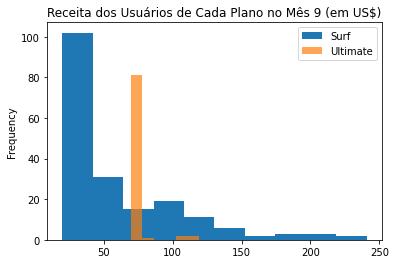

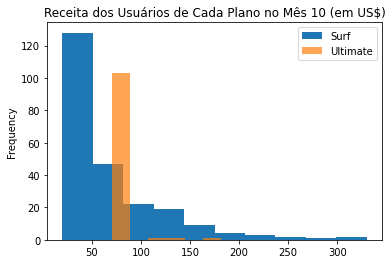

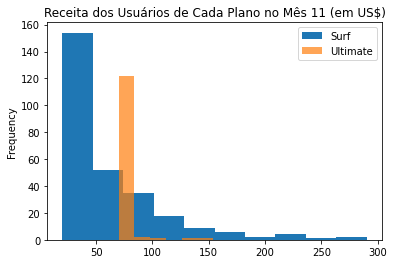

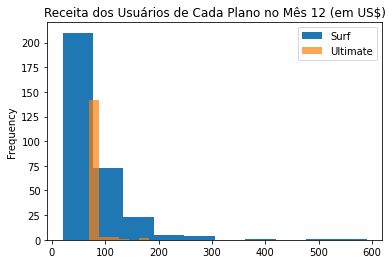

In [88]:
# Comparação do consumo de internet dos usuários de cada plano a cada mês. Construção de um histograma.

for i in merge_data['month'].sort_values().unique():
    merge_data.query('month == @i & plan == "surf"')['receita_mensal'].plot(kind = 'hist', title = f'Receita dos Usuários de Cada Plano no Mês {i} (em US$)')

    merge_data.query('month == @i & plan == "ultimate"')['receita_mensal'].plot(kind = 'hist',
                                                                                bins = 6,
                                                                                alpha = 0.7)
    plt.legend(['Surf', 'Ultimate'])
    plt.show()

In [89]:
# Cálculo da média e a variação da receita por mês
merge_data.groupby('month')['receita_mensal'].agg(['mean', 'var'])

,mean,var
month,,
1,53.333333,666.666667
2,49.973125,561.158223
3,55.790000,1216.825088
4,50.260986,1093.939618
5,53.946887,1535.199526
6,56.575000,1470.058343
7,65.697556,2025.925360
8,66.651717,2553.267600
9,62.498821,1627.407707


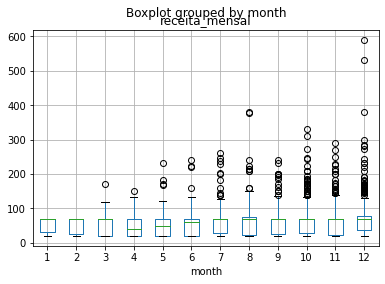

In [90]:
# Criação de um diagrama de caixa para visualizar a distribuição da receita mensal

merge_data.boxplot(column = 'receita_mensal', by = 'month')

plt.show()

O gráfico da receita mensal por plano evidencia que os usuários do plano Surf possuem receita maior para a Megaline do que os usuários do plano Ultimate. Curiosamente, o plano Surf possui valor fixo (US$ 20,00) de abaixo do valor Ultimate (US$ 70,00), o que significa que para o plano surf ter maior receita ele necessariamente possui uma quantidade de usuários muito maior(1ª tese) e/ou os seus usuários contratam muitos pacotes adicionais(2ª tese).

Vamos verificar a primeira tese:



In [91]:
#Número de usuários plano surf
users[users['plan'] == 'surf'].shape[0]

339

In [92]:
users[users['plan'] == 'ultimate'].shape[0]

161

De fato, a tabela users registra mais que o dobro de usuários do plano "surf" em relação aos usuários do plano "ultimate", mas só isso não justifica a receita maior do plano "surf".

Os histogramas confirmam a segunda tese. Observa-se que os usuários do plano Ultimate não contratam muitos pacotes adicionais, uma vez que a receita pouco varia de US$ 70,00. O plano Surf, por sua vez, registra receitas individuais além do custo fixo do plano com muito mais frequência (no mês de dezembro, por exemplo, há registro de faturas com valores superiores a 500 dólares!). 

Os dados de variância também corroboram com isso. Observa-se uma grande dispersão nos dados, sobretudo entre os meses de Julho e Dezembro, o que confirma que há muitas contratações de pacotes adicionais.

## Teste hipóteses estatísticas

**Hipótese 1: Receitas Médias dos usuários dos planos de chamadas Ultimate e Surf são diferentes**

População 1: Receitas dos usuários do plano Surf
População 2: Receitas dos usuários do plano Ultimate  

Hipótese Nula: Receitas dos usuários Ultimate e Surf são iguais  
Hipótes Alternativa: Receitas dos usuários Ultimate e Surf são diferentes

Para teste da hipótese, utilizarei um nível de significância (alfa) de 5% e utilizarei a função _scipy.stats.ttest_ind(array1, array2, equal_var)_

In [93]:
#População 1: Receitas dos usuários do plano Surf

sample_1 = merge_data.query('plan == "surf"')['receita_mensal']

#População 2: Receitas dos usuários do plano Ultimate
sample_2 = merge_data.query('plan == "ultimate"')['receita_mensal']

#Nível de Significância
alpha = 0.05

Antes de testar a igualdade entre as médias será preciso testar a igualdade da variância das duas populações.

Hipótese Nula: A variância das populações são iguais  
Hipótese Alternativa: A variâncias das populações são diferentes  

Para isso, será utilizado o teste de Levene.

In [94]:
# Teste de Levene

results_levene = st.levene(sample_1, sample_2)

print('valor-p: ', results_levene.pvalue) # extraindo o valor-p

if results_levene.pvalue < alpha: # comparando o valor-p com o limiar
    print("Rejeitamos a hipótese nula. Portanto, ao nível de 5%, há evidências de que a variância das populações são diferentes")
else:
    print("Não podemos rejeitar a hipótese nula. Portanto, ao nível de 5%, há evidências de que a variância das populações são iguais") 


valor-p:  5.028876110654919e-83
Rejeitamos a hipótese nula. Portanto, ao nível de 5%, há evidências de que a variância das populações são diferentes


Como rejeitamos a hipótese nula, utilizaremos _equal_var=False_ no método _st.ttest_ind()_ a seguir

In [95]:
# Teste as hipóteses
results = st.ttest_ind(sample_1, sample_2, equal_var = False)

print('valor-p: ', results.pvalue) # extraindo o valor-p

if results.pvalue < alpha: # comparando o valor-p com o limiar
    print("Rejeitamos a hipótese nula. Portanto, ao nível de 5%, há evidências de que a receita média dos usuários Ultimate e Surf são diferentes")
else:
    print("Não podemos rejeitar a hipótese nula. Portanto, ao nível de 5%, não há evidências de que a receita média dos usuários Ultimate e Surf são diferentes") 


valor-p:  3.17039054811355e-15
Rejeitamos a hipótese nula. Portanto, ao nível de 5%, há evidências de que a receita média dos usuários Ultimate e Surf são diferentes


**Hipótese 2: Receitas Médias dos usuários da área de NY-NJ difere dos usuários das demais regiões**

População 1: Receita média dos usuários de NY-NJ  
População 2: Receitas média dos usuários das demais regiões

Hipótese Nula: Receita dos usuários de NY-NJ é igual a receita das demais regiões   
Hipótes Alternativa: Receita dos usuários de NY-NJ é diferente da receita das demais regiões 

Para teste da hipótese, utilizarei um nível de significância (alfa) de 5% e utilizarei a função _scipy.stats.ttest_ind(array1, array2, equal_var)_

In [ ]:
users[users['user_id'] == 1001]['city'].str.contains('NJ').values[0]

In [ ]:
# Adição de coluna booleana que informa se é NY-NJ ou não
isny_nj = []

for user in merge_data['user_id']:
    if users[users['user_id'] == user]['city'].str.contains('NY-NJ').values[0]:
        isny_nj.append(True)
    else:
        isny_nj.append(False)

merge_data['NY-NJ'] = isny_nj

In [ ]:
merge_data['NY-NJ']

In [ ]:
#População 1: Receita média dos usuários de NY-NJ  

sample_1 = merge_data[merge_data['NY-NJ'] == True]['receita_mensal']

#População 2: Receitas média dos usuários das demais regiões

sample_2 = merge_data[merge_data['NY-NJ'] == False]['receita_mensal']

#Nível de Significância
alpha = 0.05

Antes de testar a igualdade entre as médias será preciso testar a igualdade da variância das duas populações.

Hipótese Nula: A variância das populações são iguais  
Hipótese Alternativa: A variâncias das populações são diferentes  

Para isso, será utilizado o teste de Lavene.

In [ ]:
# Teste de Levene

results_levene = st.levene(sample_1, sample_2)

print('valor-p: ', results_levene.pvalue) # extraindo o valor-p

if results_levene.pvalue < alpha: # comparando o valor-p com o limiar
    print("Rejeitamos a hipótese nula. Portanto, ao nível de 5%, há evidências de que a variância das populações são diferentes")
else:
    print("Não podemos rejeitar a hipótese nula. Portanto, ao nível de 5%, há evidências de que a variância das populações são iguais") 


Como não rejeitamos a hipótese nula, utilizaremos _equal_var=True_ no método _st.ttest_ind()_ a seguir

In [ ]:
# Teste as hipóteses
results = st.ttest_ind(sample_1, sample_2, equal_var = True)

print('valor-p: ', results.pvalue) # extraindo o valor-p

if results.pvalue < alpha: # comparando o valor-p com o limiar
    print("Rejeitamos a hipótese nula. Portanto, ao nível de 5%, não há evidências de que a receita média dos usuários de NY-NJ é igual a receita das demais regiões")
else:
    print("Não podemos rejeitar a hipótese nula. Portanto, ao nível de 5%, não há evidências de que a receita média dos usuários de NY-NJ é diferente a receita das demais regiões") 

## Conclusão geral

Esse estudo nos permite concluir que a estratégia de oferecer um plano com benefícios reduzidos e oferta de pacotes adicionais colabora muito com o aumento da receita da Megaline.

O estudo da receita por plano por mês evidenciou uma contratação em massa de pacotes adicionais. Contudo, para concluir se essa é uma estratégia correta é importante a coleta de novas informações e indicadores. Não se sabe, por exemplo, se a contrtação de pacotes adicionais eleva a taxa de _churn_ a ponto de ser mais lucrativo aumentar o valor e benefícios do pacote surf e manter o cliente.

Ainda nesse estudo, aceitamos duas hipóteses: a de que a _receita média dos usuários da área de NY-NJ difere da receita dos usuários das demais regiões_ e a de que a _ 